# 참고 사이트 목록

In [ ]:
# 참고한 사이트입니다.

# hankuk_geo.json
# 대한민국 행정동 경계 파일입니다.

#     통계청 통계지리정보서비스에서 제공하는 행정동 경계 파일을 바탕으로, 행정동 변경 이력을 수정하여 반영한 파일입니다.
#     geojson 형식이며, 좌표계는 WGS84 (EPSG:4326) 입니다.
#     geojson 및 csv 파일 인코딩 형식은 UTF-8입니다.
#     topology 정합성을 검토하였습니다.(폴리곤 경계끼리 잘 맞습니다)
#     속성의 adm_cd 는 통계청에서 사용하는 7자리의 [한국행정구역분류코드]입니다.
#     속성의 adm_cd2 는 행정안전부 사용하는 10자리의 [행정기관코드]입니다.(2018.07.24 업데이트 파일부터 적용)
#     속성의 adm_nm 은 통계청에서 사용하는 전국 행정동 이름입니다.

#https://github.com/vuski/admdongkor

# ===================================================================================================================

# 지도 데이터 시각화
# https://dailyheumsi.tistory.com/141 --> shp 파일을 pandas 에서 시각화

# https://blog.naver.com/kcchang61/221350672356

# 지하철 데이터
 # https://blog.naver.com/yug311861/221970210014


# ===================================================================================================================

# 데이터 전처리
# https://note.espriter.net/1325 -> 특정 값 컬럼 제거

# 특정 범위 내 마커 파악
# https://devtalk.kakao.com/t/circle/106394/2

# 마커 클러스터
# https://oboki.net/workspace/python/folium-%EC%A7%80%EB%A6%AC%EC%A0%95%EB%B3%B4-%EC%8B%9C%EA%B0%81%ED%99%94/

# 지하철역 및 교통접근성 시각화

In [ ]:
import pandas as pd
import json
import folium


# https://blog.naver.com/kcchang61/221350672356

# 구단위 지도 그리기
geo_path = './data/pro_data/hankuk2_geo.json'
geo_str = json.load(open(geo_path, encoding='utf-8')) # 딕셔너리 객체로 리턴


# geojson과 동별 인구수를 합친 엑셀 파일 불러오기 --> 구로구 항동 누락값은 직접 추가
final_data = pd.read_excel('./data/pro_data/테스트.xlsx', thousands = ',')  
final_data.columns = final_data.columns.map(str)

# display(final_data.head())


# # 지역별, 동별 구분 경계선 
map = folium.Map(location=[37.5502, 126.982], zoom_start=13,
                 tiles='Stamen Toner') # Stamen Toner / Stamen Terrain


nm = '접근성'
fmap=folium.Choropleth(geo_data = geo_str,
                       data = final_data,
                       columns = ['adm_nm',nm], 
                       fill_color='YlOrRd', fill_opacity=0.5, line_opacity=0.9,
                       key_on='feature.properties.adm_nm'
                      ).add_to(map)                             


# 지역 이름을 툴팁으로                                  
fmap.geojson.add_child(
    folium.features.GeoJsonTooltip(['adm_nm'],labels=False) # 해당 지역마다 툴팁으로 마우스오버 작동하게 만듦
)


# # 지하철 리스트를 데이터프레임 변환
df = pd.read_excel('./data/pro_data/지하철노선위경도정보3.xlsx') # 데이터 프레임 형성


# 인근 지역 마커 카운터(마커 클러스터)
from folium.plugins import MarkerCluster
marker_cluster = MarkerCluster().add_to(map)
# 지하철 역 클러스터링
for i in range(len(df)):
    x = df.iloc[i][1]
    y = df.iloc[i][2]
    z = df.iloc[i][0]
    folium.Marker(
        location=[x,y],
        popup=z,
        icon=folium.Icon(color='blue',icon='star'),
      ).add_to(marker_cluster)

    
    
display(map)

# KNN 분석

In [ ]:
## KNN분석을 시도해보자!! --> numpy 형식을 맞춰야 해서 오류!!

import pandas as pd
import seaborn as sns
import numpy as np


# 군집분석용 데이터 불러오기
knn_data = pd.read_excel('./data/pro_data/last.xlsx')
knn_data = knn_data.drop(knn_data.columns[[0]], axis=1)
# display(knn_data.head())

# 군집분석 전 NaN 값 0으로 치환하기
knn_data.fillna(0, inplace=True)
knn_data[['자전거도로길이','인구', '인구밀도', '지하철역개수', '버스정거장개수', '교통편']] = knn_data[['자전거도로길이','인구', '인구밀도', '지하철역개수', '버스정거장개수', '교통편']].astype('float')
# knn_data.info()

# 종속변수 만들기 --> 평균 이상인가, 평균 이상이 아닌가.
# print(knn_data['자전거이용비율'].median())

list1 = []
for x in range(len(knn_data)):
    if knn_data.iloc[x,13] > 1.3 :
        i = 1
        list1.append(i)
    else :
        i = 0
        list1.append(i)
        
# print(list1)

knn_data['이용여부'] = list1
knn_data.drop(['자전거이용비율'], axis=1, inplace=True)


#####  3개로 나눴을 때!!!!!
# 자전거 이용 비율을 1을 기준으로 넘지 못하면 0, 넘으면 1로 잡자 --> 연속형 데이터를 범주형으로 
# 1. cut()이용해 자전거이용비율을 구간분할 한다 
# count, boundary = np.histogram(knn_data['자전거이용비율'], bins=3)
# # print(boundary) # 12.7이 평균값

# col_name = ['저이용', '보통이용', '고이용']

# # 데이터구간분할  // 오류발생!!
# knn_data['자전거이용비율분류'] = pd.cut(x=knn_data['자전거이용비율'],
#                                           bins = boundary,
#                                           labels=col_name,
#                                           include_lowest = True)

# # print(knn_data[['자전거이용비율', '자전거이용비율분류']])

# # 2. 원핫인코딩으로 더미변수를 만들어 둔다. -> 자전거이용비율컬럼은 삭제한다.
# knn_data_dummies = pd.get_dummies(knn_data['자전거이용비율분류'])
# # print(knn_data_dummies)

# knn_data = pd.concat([knn_data, knn_data_dummies], axis=1)
# knn_data.drop(['자전거이용비율분류', '자전거이용비율'], axis=1, inplace=True)

# display(knn_data)

### 여기서부터는 knn 분석을 시행한다. 
# 훈련 / 검증 데이터 분할
X = knn_data[['경사도', '자전거도로길이', '총거치대수', '총대여수', '인구', '면적', '접근성', '교통편']]
Y = knn_data['이용여부']

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

# print('훈련 데이터 :', X_train.shape)
# print('테스트 데이터:', X_test.shape)


# 모형 학습 및 검증
from sklearn.neighbors import KNeighborsClassifier

# 모형객체 생성
knn = KNeighborsClassifier(n_neighbors=5)

# 훈련데이터로 모형학습
knn.fit(X_train, Y_train)

# 테스트데이터를 통해 예측
Y_hat = knn.predict(X_test)

# print(Y_hat[0:10])
# print(Y_test.values[0:10])

# 모형 성능 평가
from sklearn import metrics
knn_metrix = metrics.confusion_matrix(Y_test, Y_hat)
print(knn_metrix) 
# 테스트 데이터 128개 중 이용을 잘 안한다는 것을 맞춘 것이 54, 이용을 잘 이용 안하는데 이용한다고 말한 것이 5개, 
# 이용을 하는데 잘 이용하지 않는다고 말한 것이 15개, 잘 이용한다고 맞춘 것이 54개

knn_report = metrics.classification_report(Y_test, Y_hat)
print(knn_report)

# 군집분석

<AxesSubplot:xlabel='교통편', ylabel='총대여수'>

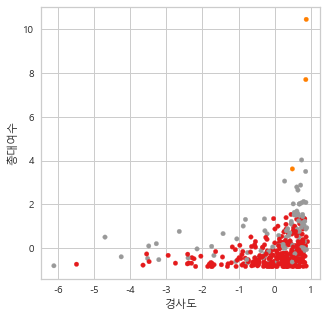

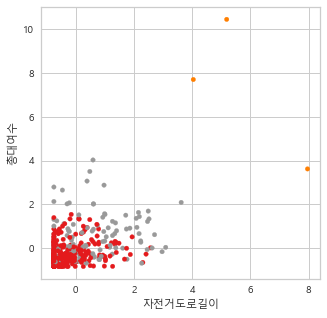

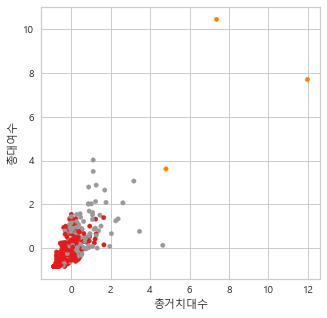

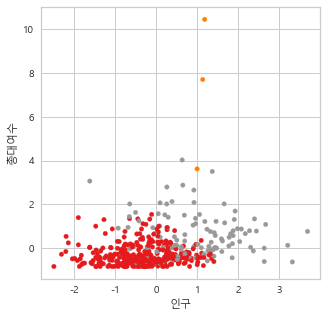

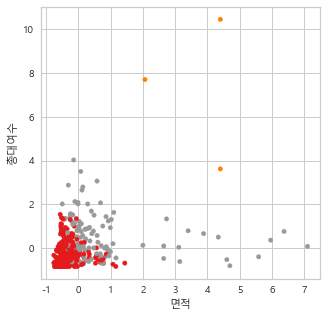

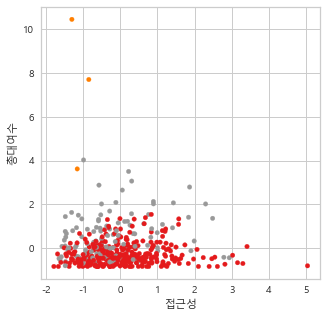

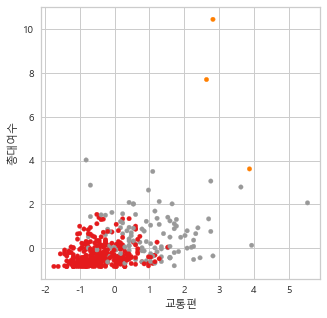

In [3]:
### 군집분석을 해보자 ### 판다스 책 p331

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import cluster
# from sklearn import datasets
# from sklearn.clsuter improt Kmeans
# from sklearn.datasets import make_blobs

# 폰트깨지는 것 방지
from matplotlib import font_manager, rc
font_path = "data/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
# print (plt.rcParams['font.family'] )
matplotlib.font_manager._rebuild()
matplotlib.rcParams['axes.unicode_minus'] = False
######################################################################################################################


#### 데이터 준비
cluster_data = pd.read_excel('./data/pro_data/last.xlsx')
cluster_data.fillna(0, inplace=True)
cluster_data = cluster_data.drop(cluster_data.columns[[0]], axis=1)
cluster_data.set_index(['동'], inplace=True)
cluster_data = cluster_data[['경사도', '자전거도로길이', '총거치대수', '총대여수', '인구', '면적', '접근성', '교통편']]
# display(cluster_data)

### 정규화
def z_score(x):
    return (x-x.mean())/x.std()
cluster_data = cluster_data.apply(z_score,axis=0)
# display(cluster_data.head())


# 모형 준비
x = cluster_data.iloc[:, :]
x = preprocessing.StandardScaler().fit(x).transform(x)
# print(x[:5])


####  모형 학습 및 검증


# 모형 객체 생성
kmeans = cluster.KMeans(init='k-means++', n_clusters=3, n_init=10)

# 모형 학습
kmeans.fit(x)

# 예측(군집)
cluster_label = kmeans.labels_
# print(cluster_label)

# 예측결과를 데이터베이스에 입력
cluster_data['군집'] = cluster_label
# display(cluster_data.head(5))

# 그래프로 표현 - 시각화
cluster_data.plot(kind='scatter', x='경사도', y='총대여수', c='군집', cmap='Set1', colorbar=False, figsize=(5,5), legend=True)
cluster_data.plot(kind='scatter', x='자전거도로길이', y='총대여수', c='군집', cmap='Set1', colorbar=False, figsize=(5,5), legend=True)
cluster_data.plot(kind='scatter', x='총거치대수', y='총대여수', c='군집', cmap='Set1', colorbar=False, figsize=(5,5), legend=True)
cluster_data.plot(kind='scatter', x='인구', y='총대여수', c='군집', cmap='Set1', colorbar=False, figsize=(5,5), legend=True)
cluster_data.plot(kind='scatter', x='면적', y='총대여수', c='군집', cmap='Set1', colorbar=False, figsize=(5,5), legend=True)
cluster_data.plot(kind='scatter', x='접근성', y='총대여수', c='군집', cmap='Set1', colorbar=False, figsize=(5,5), legend=True)
cluster_data.plot(kind='scatter', x='교통편', y='총대여수', c='군집', cmap='Set1', colorbar=False, figsize=(5,5), legend=True)



# print("###########################################################################################################")
# #### 큰 값으로 구성된 클러스터 (0,4) 제외 - 값이 몰려있는 구간을 자세하게 분석
# mask = (cluster_data['군집'] == 0) | (cluster_data['군집'] == 4)
# cluster_data1 = cluster_data[~mask]
# cluster_data1.plot(kind='scatter', x='경사도', y='총대여수', c='군집', cmap='Set1', colorbar=True, figsize=(5,5))
# cluster_data1.plot(kind='scatter', x='자전거도로길이', y='총대여수', c='군집', cmap='Set1', colorbar=True, figsize=(5,5))
# cluster_data1.plot(kind='scatter', x='총거치대수', y='총대여수', c='군집', cmap='Set1', colorbar=True, figsize=(5,5))
# cluster_data1.plot(kind='scatter', x='인구', y='총대여수', c='군집', cmap='Set1', colorbar=True, figsize=(5,5))
# cluster_data1.plot(kind='scatter', x='면적', y='총대여수', c='군집', cmap='Set1', colorbar=True, figsize=(5,5))
# cluster_data1.plot(kind='scatter', x='접근성', y='총대여수', c='군집', cmap='Set1', colorbar=True, figsize=(5,5))
# cluster_data1.plot(kind='scatter', x='교통편', y='총대여수', c='군집', cmap='Set1', colorbar=True, figsize=(5,5))

In [ ]:
import seaborn as sns
sns.scatterplot(x='경사도', y='총대여수', hue='군집', s=100, palette='Set1', data=cluster_data)

In [ ]:
sns.scatterplot(x='자전거도로길이', y='총대여수', hue='군집', s=100, palette='Set1', data=cluster_data)


In [ ]:
sns.scatterplot(x='총거치대수', y='총대여수', hue='군집', s=100, palette='Set1', data=cluster_data)


In [ ]:
sns.scatterplot(x='인구', y='총대여수', hue='군집', s=100, palette='Set1', data=cluster_data)


In [ ]:
sns.scatterplot('면적', y='총대여수', hue='군집', s=100, palette='Set1', data=cluster_data)


In [ ]:
sns.scatterplot(x='접근성', y='총대여수', hue='군집', s=100, palette='Set1', data=cluster_data)


In [ ]:
sns.scatterplot(x='교통편', y='총대여수', hue='군집', s=100, palette='Set1', data=cluster_data)

# 군집분석 다시!

In [6]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import cluster
from sklearn.cluster import KMeans

X = cluster_data['군집']



def elbow(X) :
    SSE =[]
    for i in range(1,11) :
        km = KMeans(n_cluster=i, init='k-means++', random_state=0)
        km.fit(X)
        sse.append(km.inertia_)
        
    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('클러스터 개수')
    plt.ylabel('SSE')
    plt.show
    
elbow(X)

TypeError: __init__() got an unexpected keyword argument 'n_cluster'

In [5]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
 
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(cluster_data['군집'].reshape(-1,1))

AttributeError: 'Series' object has no attribute 'reshape'

In [ ]:
# 여기서부터는 사전에 처리한 전처리 코드입니당!!

In [ ]:
# geojson에서 특정 값 추출하기!!
import pandas as pd
# json 파일 불러오기
import json
geo_path = './data/pro_data/hankuk1_geo.json'
geo_str = json.load(open(geo_path, encoding='utf-8')) 

# 행정동 추출하기
geo_nm = []
for i in range(425):
    points = geo_str['features'][i]['properties']['adm_nm']
#     print(points)
    geo_nm.append(points)
geo_data = pd.DataFrame(geo_nm)
display(geo_data)
# geo_data.to_excel('./data/동정보만.xlsx')

# 행정동 경계 추출하기
geo_loc = []
for i in range(425):
    points = geo_str['features'][i]['geometry']['coordinates']
    geo_loc.append(points)
    
geo_data1 =pd.DataFrame(geo_loc)
display(geo_data1)

df_all = pd.concat([geo_data, geo_data1], axis=1)
df_all.columns = ['행정동', '경계']
df_all.to_excel('./data/경계.xlsx')
display(df_all)

In [ ]:
# 행정동 전처리 -> geojson과 동일하게 이름을 바꾼 뒤 merge로 합치기 위한 사전작업
import pandas as pd
pop = pd.read_csv('./data/pro_data/서울동별인구데이터1.txt', sep="\t")
# 서울 동별 인구 "합계", "소계" 없애기
pop_1 = pop['자치구'].isin(['합계','소계'])
pop_2 = pop[~pop_1]
pop_3 = pop_2['동'].isin(['합계','소계'])
pop_last = pop_2[~pop_3]

pop_last.to_csv('./data/pro_data/서울동별인구데이터1.csv')

pop = pd.read_csv('./data/pro_data/서울동별인구데이터1.csv')
pop.drop('Unnamed: 0',axis=1, inplace=True)
display(pop)

# 새로운 동 이름 만들어보기

list1 = []
for i in range(424):
    x = '서울특별시'
    y = pop.loc[i]['자치구']
    z = pop.loc[i]['동']
    a = x +' '+ y +' '+ z
    list1.append(a)
    print('"',a,'"', sep="", end=", ")

pop['주소'] = list1

geo_data1['주소'] = ["서울특별시 종로구 사직동", "서울특별시 종로구 삼청동", "서울특별시 종로구 부암동", "서울특별시 종로구 평창동", "서울특별시 종로구 무악동", "서울특별시 종로구 교남동", "서울특별시 종로구 가회동", "서울특별시 종로구 종로1·2·3·4가동", "서울특별시 종로구 종로5·6가동", "서울특별시 종로구 이화동", "서울특별시 종로구 창신1동", "서울특별시 종로구 창신2동", "서울특별시 종로구 창신3동", "서울특별시 종로구 숭인1동", "서울특별시 종로구 숭인2동", "서울특별시 종로구 청운효자동", "서울특별시 종로구 혜화동", "서울특별시 중구 소공동", "서울특별시 중구 회현동", "서울특별시 중구 명동", "서울특별시 중구 필동", "서울특별시 중구 장충동", "서울특별시 중구 광희동", "서울특별시 중구 을지로동", "서울특별시 중구 신당5동", "서울특별시 중구 황학동", "서울특별시 중구 중림동", "서울특별시 중구 신당동", "서울특별시 중구 다산동", "서울특별시 중구 약수동", "서울특별시 중구 청구동", "서울특별시 중구 동화동", "서울특별시 용산구 후암동", "서울특별시 용산구 용산2가동", "서울특별시 용산구 남영동", "서울특별시 용산구 원효로2동", "서울특별시 용산구 효창동", "서울특별시 용산구 용문동", "서울특별시 용산구 이촌1동", "서울특별시 용산구 이촌2동", "서울특별시 용산구 이태원1동", "서울특별시 용산구 이태원2동", "서울특별시 용산구 서빙고동", "서울특별시 용산구 보광동", "서울특별시 용산구 청파동", "서울특별시 용산구 원효로1동", "서울특별시 용산구 한강로동", "서울특별시 용산구 한남동", "서울특별시 성동구 왕십리2동", "서울특별시 성동구 마장동", "서울특별시 성동구 사근동", "서울특별시 성동구 행당1동", "서울특별시 성동구 행당2동", "서울특별시 성동구 응봉동", "서울특별시 성동구 금호1가동", "서울특별시 성동구 금호4가동", "서울특별시 성동구 성수1가1동", "서울특별시 성동구 성수1가2동", "서울특별시 성동구 성수2가1동", "서울특별시 성동구 성수2가3동", "서울특별시 성동구 송정동", "서울특별시 성동구 용답동", "서울특별시 성동구 왕십리도선동", "서울특별시 성동구 금호2·3가동", "서울특별시 성동구 옥수동", "서울특별시 광진구 화양동", "서울특별시 광진구 군자동", "서울특별시 광진구 중곡1동", "서울특별시 광진구 중곡2동", "서울특별시 광진구 중곡3동", "서울특별시 광진구 중곡4동", "서울특별시 광진구 능동", "서울특별시 광진구 구의1동", "서울특별시 광진구 구의2동", "서울특별시 광진구 구의3동", "서울특별시 광진구 광장동", "서울특별시 광진구 자양1동", "서울특별시 광진구 자양2동", "서울특별시 광진구 자양3동", "서울특별시 광진구 자양4동", "서울특별시 동대문구 회기동", "서울특별시 동대문구 휘경1동", "서울특별시 동대문구 휘경2동", "서울특별시 동대문구 청량리동", "서울특별시 동대문구 용신동", "서울특별시 동대문구 제기동", "서울특별시 동대문구 전농1동", "서울특별시 동대문구 전농2동", "서울특별시 동대문구 답십리1동", "서울특별시 동대문구 답십리2동", "서울특별시 동대문구 장안1동", "서울특별시 동대문구 장안2동", "서울특별시 동대문구 이문1동", "서울특별시 동대문구 이문2동", "서울특별시 중랑구 면목2동", "서울특별시 중랑구 면목4동", "서울특별시 중랑구 면목5동", "서울특별시 중랑구 면목7동", "서울특별시 중랑구 상봉1동", "서울특별시 중랑구 상봉2동", "서울특별시 중랑구 중화1동", "서울특별시 중랑구 중화2동", "서울특별시 중랑구 묵1동", "서울특별시 중랑구 묵2동", "서울특별시 중랑구 망우3동", "서울특별시 중랑구 신내1동", "서울특별시 중랑구 신내2동", "서울특별시 중랑구 면목본동", "서울특별시 중랑구 면목3·8동", "서울특별시 중랑구 망우본동", "서울특별시 성북구 돈암1동", "서울특별시 성북구 돈암2동", "서울특별시 성북구 안암동", "서울특별시 성북구 보문동", "서울특별시 성북구 정릉1동", "서울특별시 성북구 정릉2동", "서울특별시 성북구 정릉3동", "서울특별시 성북구 정릉4동", "서울특별시 성북구 길음1동", "서울특별시 성북구 길음2동", "서울특별시 성북구 월곡1동", "서울특별시 성북구 월곡2동", "서울특별시 성북구 장위1동", "서울특별시 성북구 장위2동", "서울특별시 성북구 장위3동", "서울특별시 성북구 성북동", "서울특별시 성북구 삼선동", "서울특별시 성북구 동선동", "서울특별시 성북구 종암동", "서울특별시 성북구 석관동", "서울특별시 강북구 번1동", "서울특별시 강북구 번2동", "서울특별시 강북구 번3동", "서울특별시 강북구 수유1동", "서울특별시 강북구 수유2동", "서울특별시 강북구 수유3동", "서울특별시 강북구 삼양동", "서울특별시 강북구 미아동", "서울특별시 강북구 송중동", "서울특별시 강북구 송천동", "서울특별시 강북구 삼각산동", "서울특별시 강북구 우이동", "서울특별시 강북구 인수동", "서울특별시 도봉구 쌍문1동", "서울특별시 도봉구 쌍문2동", "서울특별시 도봉구 쌍문3동", "서울특별시 도봉구 쌍문4동", "서울특별시 도봉구 방학1동", "서울특별시 도봉구 방학2동", "서울특별시 도봉구 방학3동", "서울특별시 도봉구 창1동", "서울특별시 도봉구 창2동", "서울특별시 도봉구 창3동", "서울특별시 도봉구 창4동", "서울특별시 도봉구 창5동", "서울특별시 도봉구 도봉1동", "서울특별시 도봉구 도봉2동", "서울특별시 노원구 월계1동", "서울특별시 노원구 월계2동", "서울특별시 노원구 월계3동", "서울특별시 노원구 공릉2동", "서울특별시 노원구 하계1동", "서울특별시 노원구 하계2동", "서울특별시 노원구 중계본동", "서울특별시 노원구 중계1동", "서울특별시 노원구 중계4동", "서울특별시 노원구 상계1동", "서울특별시 노원구 상계2동", "서울특별시 노원구 상계5동", "서울특별시 노원구 상계8동", "서울특별시 노원구 상계9동", "서울특별시 노원구 상계10동", "서울특별시 노원구 상계3·4동", "서울특별시 노원구 상계6·7동", "서울특별시 노원구 중계2·3동", "서울특별시 노원구 공릉1동", "서울특별시 은평구 녹번동", "서울특별시 은평구 불광1동", "서울특별시 은평구 갈현1동", "서울특별시 은평구 갈현2동", "서울특별시 은평구 구산동", "서울특별시 은평구 대조동", "서울특별시 은평구 응암1동", "서울특별시 은평구 응암2동", "서울특별시 은평구 신사1동", "서울특별시 은평구 신사2동", "서울특별시 은평구 증산동", "서울특별시 은평구 수색동", "서울특별시 은평구 진관동", "서울특별시 은평구 불광2동", "서울특별시 은평구 응암3동", "서울특별시 은평구 역촌동", "서울특별시 서대문구 천연동", "서울특별시 서대문구 홍제1동", "서울특별시 서대문구 홍제3동", "서울특별시 서대문구 홍제2동", "서울특별시 서대문구 홍은1동", "서울특별시 서대문구 홍은2동", "서울특별시 서대문구 남가좌1동", "서울특별시 서대문구 남가좌2동", "서울특별시 서대문구 북가좌1동", "서울특별시 서대문구 북가좌2동", "서울특별시 서대문구 충현동", "서울특별시 서대문구 북아현동", "서울특별시 서대문구 신촌동", "서울특별시 서대문구 연희동", "서울특별시 마포구 용강동", "서울특별시 마포구 대흥동", "서울특별시 마포구 염리동", "서울특별시 마포구 신수동", "서울특별시 마포구 서교동", "서울특별시 마포구 합정동", "서울특별시 마포구 망원1동", "서울특별시 마포구 망원2동", "서울특별시 마포구 연남동", "서울특별시 마포구 성산1동", "서울특별시 마포구 성산2동", "서울특별시 마포구 상암동", "서울특별시 마포구 도화동", "서울특별시 마포구 서강동", "서울특별시 마포구 공덕동", "서울특별시 마포구 아현동", "서울특별시 양천구 목1동", "서울특별시 양천구 목2동", "서울특별시 양천구 목3동", "서울특별시 양천구 목4동", "서울특별시 양천구 신월1동", "서울특별시 양천구 신월2동", "서울특별시 양천구 신월3동", "서울특별시 양천구 신월4동", "서울특별시 양천구 신월5동", "서울특별시 양천구 신월6동", "서울특별시 양천구 신월7동", "서울특별시 양천구 신정1동", "서울특별시 양천구 신정2동", "서울특별시 양천구 신정3동", "서울특별시 양천구 신정6동", "서울특별시 양천구 신정7동", "서울특별시 양천구 목5동", "서울특별시 양천구 신정4동", "서울특별시 강서구 염창동", "서울특별시 강서구 등촌1동", "서울특별시 강서구 등촌2동", "서울특별시 강서구 등촌3동", "서울특별시 강서구 화곡본동", "서울특별시 강서구 화곡2동", "서울특별시 강서구 화곡3동", "서울특별시 강서구 화곡4동", "서울특별시 강서구 화곡6동", "서울특별시 강서구 화곡8동", "서울특별시 강서구 가양1동", "서울특별시 강서구 가양2동", "서울특별시 강서구 가양3동", "서울특별시 강서구 발산1동", "서울특별시 강서구 공항동", "서울특별시 강서구 방화1동", "서울특별시 강서구 방화2동", "서울특별시 강서구 방화3동", "서울특별시 강서구 화곡1동", "서울특별시 강서구 우장산동", "서울특별시 구로구 신도림동", "서울특별시 구로구 구로1동", "서울특별시 구로구 구로3동", "서울특별시 구로구 구로4동", "서울특별시 구로구 구로5동", "서울특별시 구로구 고척1동", "서울특별시 구로구 고척2동", "서울특별시 구로구 개봉2동", "서울특별시 구로구 개봉3동", "서울특별시 구로구 오류1동", "서울특별시 구로구 오류2동", "서울특별시 구로구 수궁동", "서울특별시 구로구 가리봉동", "서울특별시 구로구 구로2동", "서울특별시 구로구 개봉1동", "서울특별시 금천구 가산동", "서울특별시 금천구 독산1동", "서울특별시 금천구 독산2동", "서울특별시 금천구 독산3동", "서울특별시 금천구 독산4동", "서울특별시 금천구 시흥1동", "서울특별시 금천구 시흥2동", "서울특별시 금천구 시흥3동", "서울특별시 금천구 시흥4동", "서울특별시 금천구 시흥5동", "서울특별시 영등포구 여의동", "서울특별시 영등포구 당산1동", "서울특별시 영등포구 당산2동", "서울특별시 영등포구 양평1동", "서울특별시 영등포구 양평2동", "서울특별시 영등포구 신길1동", "서울특별시 영등포구 신길3동", "서울특별시 영등포구 신길4동", "서울특별시 영등포구 신길5동", "서울특별시 영등포구 신길6동", "서울특별시 영등포구 신길7동", "서울특별시 영등포구 대림1동", "서울특별시 영등포구 대림2동", "서울특별시 영등포구 대림3동", "서울특별시 영등포구 영등포본동", "서울특별시 영등포구 영등포동", "서울특별시 영등포구 도림동", "서울특별시 영등포구 문래동", "서울특별시 동작구 노량진2동", "서울특별시 동작구 상도1동", "서울특별시 동작구 상도2동", "서울특별시 동작구 상도3동", "서울특별시 동작구 상도4동", "서울특별시 동작구 사당1동", "서울특별시 동작구 사당3동", "서울특별시 동작구 사당4동", "서울특별시 동작구 사당5동", "서울특별시 동작구 대방동", "서울특별시 동작구 신대방1동", "서울특별시 동작구 신대방2동", "서울특별시 동작구 흑석동", "서울특별시 동작구 노량진1동", "서울특별시 동작구 사당2동", "서울특별시 관악구 보라매동", "서울특별시 관악구 청림동", "서울특별시 관악구 행운동", "서울특별시 관악구 낙성대동", "서울특별시 관악구 중앙동", "서울특별시 관악구 인헌동", "서울특별시 관악구 남현동", "서울특별시 관악구 서원동", "서울특별시 관악구 신원동", "서울특별시 관악구 서림동", "서울특별시 관악구 신사동", "서울특별시 관악구 신림동", "서울특별시 관악구 난향동", "서울특별시 관악구 조원동", "서울특별시 관악구 대학동", "서울특별시 관악구 은천동", "서울특별시 관악구 성현동", "서울특별시 관악구 청룡동", "서울특별시 관악구 난곡동", "서울특별시 관악구 삼성동", "서울특별시 관악구 미성동", "서울특별시 서초구 서초1동", "서울특별시 서초구 서초2동", "서울특별시 서초구 서초3동", "서울특별시 서초구 서초4동", "서울특별시 서초구 잠원동", "서울특별시 서초구 반포본동", "서울특별시 서초구 반포1동", "서울특별시 서초구 반포2동", "서울특별시 서초구 반포3동", "서울특별시 서초구 반포4동", "서울특별시 서초구 방배본동", "서울특별시 서초구 방배1동", "서울특별시 서초구 방배2동", "서울특별시 서초구 방배3동", "서울특별시 서초구 방배4동", "서울특별시 서초구 양재1동", "서울특별시 서초구 양재2동", "서울특별시 서초구 내곡동", "서울특별시 강남구 신사동", "서울특별시 강남구 논현1동", "서울특별시 강남구 논현2동", "서울특별시 강남구 삼성1동", "서울특별시 강남구 삼성2동", "서울특별시 강남구 대치1동", "서울특별시 강남구 대치4동", "서울특별시 강남구 역삼1동", "서울특별시 강남구 역삼2동", "서울특별시 강남구 도곡1동", "서울특별시 강남구 도곡2동", "서울특별시 강남구 개포1동", "서울특별시 강남구 개포4동", "서울특별시 강남구 일원본동", "서울특별시 강남구 일원1동", "서울특별시 강남구 일원2동", "서울특별시 강남구 수서동", "서울특별시 강남구 세곡동", "서울특별시 강남구 압구정동", "서울특별시 강남구 청담동", "서울특별시 강남구 대치2동", "서울특별시 강남구 개포2동", "서울특별시 송파구 풍납1동", "서울특별시 송파구 풍납2동", "서울특별시 송파구 거여1동", "서울특별시 송파구 거여2동", "서울특별시 송파구 마천1동", "서울특별시 송파구 마천2동", "서울특별시 송파구 방이1동", "서울특별시 송파구 방이2동", "서울특별시 송파구 오륜동", "서울특별시 송파구 오금동", "서울특별시 송파구 송파1동", "서울특별시 송파구 송파2동", "서울특별시 송파구 석촌동", "서울특별시 송파구 삼전동", "서울특별시 송파구 가락본동", "서울특별시 송파구 가락1동", "서울특별시 송파구 가락2동", "서울특별시 송파구 문정1동", "서울특별시 송파구 문정2동", "서울특별시 송파구 장지동", "서울특별시 송파구 위례동", "서울특별시 송파구 잠실본동", "서울특별시 송파구 잠실4동", "서울특별시 송파구 잠실6동", "서울특별시 송파구 잠실7동", "서울특별시 송파구 잠실2동", "서울특별시 송파구 잠실3동", "서울특별시 강동구 강일동", "서울특별시 강동구 상일동", "서울특별시 강동구 명일1동", "서울특별시 강동구 명일2동", "서울특별시 강동구 고덕1동", "서울특별시 강동구 고덕2동", "서울특별시 강동구 암사2동", "서울특별시 강동구 암사3동", "서울특별시 강동구 천호1동", "서울특별시 강동구 천호3동", "서울특별시 강동구 성내1동", "서울특별시 강동구 성내2동", "서울특별시 강동구 성내3동", "서울특별시 강동구 둔촌1동", "서울특별시 강동구 둔촌2동", "서울특별시 강동구 암사1동", "서울특별시 강동구 천호2동", "서울특별시 강동구 길동"]
geo_data1.to_excel('./data/pro_data/지리정보만.xlsx')



display(pop.head(15))

In [ ]:
# geo_data와 pop을 merge로 결합하여 NaN 값 파악
import pandas as pd

final = pd.merge(geo_data, pop, how='outer', left_on='adm_nm', right_on='주소')
print(final)

final.to_excel('./data/pro_data/통합정리.xlsx') 
# 항동 누락 --> 통합정리 파일에 직접적 추가

In [ ]:
# 행정동 경계에서 지하철 개수 계산하기
import pandas as pd
import numpy as np

# 지하철 개수를 열로 만들어붙일 통합정리 파일을 불러온다.
all_of_df = pd.read_excel('./data/pro_data/통합정리1.xlsx')

# 지하철 역 정보를 불러온다. (역이름, 위도, 경도)
ditie = pd.read_excel('./data/pro_data/지하철노선위경도정보3.xlsx')
# display(ditie.head())

# 행정동 파일을 불러와 데이터프레임을 동과 경계로 나눈다. (경계는 경도, 위도로 작성됨)
boundary = pd.read_excel('./data/pro_data/경계1.xlsx')
# display(boundary.head())

list1 = []
# 행정동 별로 경계를 unlist해서, 위도와 경도값을 각각 나눈 뒤, 위도와 경도로 각각 묶는다.
# 모든 내용을 str로 인식해 list()로 리스트를 만들면 모든 숫자가 분리 --> split을 이용해 분류
for i in range(len(boundary)):
    a = boundary.loc[i][2] 
    aa = a.split(", ")
        
    lat = [] # 위도 리스트
    lng = [] # 경도 리스트
    for z in range(len(aa)):
        if z % 2 == 0:
            lng.append(aa[z]) # 경도
        else :
            lat.append(aa[z]) # 위도

        
# # 각 리스트의 최댓값과 최솟값을 구한다. --> str을 float()를 통해 실수로 변환
    max_lat = float(max(lat));
    min_lat = float(min(lat));
    max_lng = float(max(lng));
    min_lng = float(min(lng));
    

# # 각 리스트의 최댓값과 최솟값을 사이에 두고 지하철 역의 위도, 경도가 포함되는지 확인한다 -> 확인 되면 i+1 과 같은 형태로 리턴한다.
    i = 0
    for k in range(len(ditie)):
        if min_lat < ditie.iloc[k,1] < max_lat  :
            if min_lng < ditie.iloc[k,2] < max_lng :
                i = i + 1   
    list1.append(i)

# # 마지막으로 리턴된 값을 새로운 리스트(지하철 개수)에 담는다.
all_of_df['지하철개수'] = list1
all_of_df.drop(all_of_df.columns[[1,2,3,4,5,6,11]], axis=1, inplace=True)

# 면적 대비 지하철 개수를 구한다
all_of_df['면적대비지하철개수'] = all_of_df['지하철개수'] / all_of_df['면적']
display(all_of_df)
all_of_df.to_excel('./data/pro_data/시험.xlsx')
# # 새로운 리스트를 통합정리 파일에 새로운 열로 추가한다.


In [ ]:
# 성희가 보내준 파일 불러와서 계산하기
import pandas as pd
all_of_df = pd.read_excel('./data/pro_data/통합정리1.xlsx')

all_of_df.drop('adm_cd', axis=1, inplace=True)
all_of_df.drop('adm_cd2', axis=1, inplace=True)
all_of_df.drop('sidonm', axis=1, inplace=True)
all_of_df.drop('sggnm', axis=1, inplace=True)
all_of_df.drop('기간', axis=1, inplace=True)
all_of_df.drop('자치구', axis=1, inplace=True)
all_of_df.drop('주소', axis=1, inplace=True)


count1 = pd.read_csv('./data/pro_data/지하철.csv')
count2 = pd.read_csv('./data/pro_data/버스정류장.csv')

# display(all_of_df)
# display(count1)
# display(count2)

# 지하철역 카운트
first_count = pd.merge(all_of_df, count1, how='outer', left_on='동', right_on='ADM_DR_NM_')
first_count.drop('ADM_DR_NM_', axis=1, inplace=True)
first_count.drop('Sum_Join_C', axis=1, inplace=True)
first_count.drop(424, axis=0, inplace=True)
first_count.rename(columns = {'Cnt_ADM_DR' : '지하철역개수'}, inplace=True)
first_count['지하철역개수'].fillna(0, inplace=True)
display(first_count)

check_count = pd.merge(first_count, count2, how='outer', left_on='동', right_on='ADM_DR_NM_')
check_count.drop('ADM_DR_NM_', axis=1, inplace=True)
check_count.drop('Sum_Join_C', axis=1, inplace=True)
check_count.rename(columns = {'Cnt_ADM_DR' : '버스정거장개수'}, inplace=True)
check_count.drop(424, axis=0, inplace=True)
display(check_count)

# check_count['면적대비지하철역'] = check_count['지하철역개수'] / check_count['면적']
# check_count['면적대비버스정류장'] = check_count['버스정거장개수'] / check_count['면적']
# display(check_count)

check_count['접근성'] = (check_count['지하철역개수']*4 + check_count['버스정거장개수']) / check_count['면적']
check_count['교통편'] = check_count['지하철역개수']*4 + check_count['버스정거장개수']
display(check_count)

check_count.to_excel('./data/pro_data/테스트.xlsx')



In [ ]:
## 특정 단어가 포함된 행 삭제하기

# # 동별 면적 불러오기 --> 면적 단위는 km^2 // 면적 이미 있음
# area = pd.read_csv('./data/서울시행정구역동별통계.txt', sep="\t")
# # 자치구, 동에 "합계", "소계"가 포함된 행 없애기
# area_1 = area['자치구'].isin(['합계','소계'])
# area_2 = area[~area_1]
# area_3 = area_2['동'].isin(['합계','소계'])

# area_last = area_2[~area_3]
# # display(area_last.head())


# all_data = pd.merge(pop_last, area_last, how='left', on='동')
# # display(all_data)

In [ ]:
# 동별 중앙값 불러오기
# dong = pd.read_csv('./data/pro_data/행정동별위치정보.csv', encoding='euc-kr')
# dong = dong[['행정동명', '경도', '위도']]
# dong.rename(columns = {'행정동명': '동'}, inplace=True)



# # # 동별 써클 그리기 --> 동별 중앙값을 찾은 뒤 거기서 반지름 50을 주자
# for dong,lat,lng in zip(all_data.동, all_data.위도, all_data.경도):
#     folium.CircleMarker(
#       [lat,lng],
#       radius=100,
#       color='#00ff00', # 테두리
#       fill_color='#ff000099', # 원 칼라 // 투명도도 같이 준다.
#       popup=dong
#     ).add_to(map)
#     folium.Marker(
#         [lat,lng],
#         icon=folium.Icon(color='red')
#     ).add_to(map)


In [ ]:
# 서울 동별 인구수, 면적정보, 중앙값 합치기
# all_data = pd.merge(pop_last, dong, how='outer', on='동')
# all_data.dropna(axis=0, how='any', inplace=True)

In [ ]:
## 다른 사람 자료 확인해보기
import pandas as pd
juhee2 = pd.read_csv('./data/pro_data/dong_df_1110.csv')
juhee3 = pd.read_csv('./data/pro_data/자전거대여수_all.csv')

display(juhee2)
display(juhee3)

In [ ]:
## 데이터파일 통합 정리 --> 내꺼하고 다른 사람 꺼
import pandas as pd
import re

data1 = pd.read_excel('./data/pro_data/최종정리.xlsx')
data2 = pd.read_excel('./data/pro_data/테스트.xlsx', thousands = ',')

# display(data1)
# display(data2)

all_of_data = pd.merge(data1, data2, how='outer', on='동')


all_of_data = all_of_data.drop(all_of_data.columns[[0,2,8,9]], axis=1)

all_of_data.info()
# display(all_of_data)

all_of_data['자전거이용비율'] = all_of_data['총대여수'] / all_of_data['인구']



all_of_data.to_excel('./data/pro_data/last.xlsx')

In [ ]:
## 성희 파일 읽기

# read = pd.read_csv('./data/pro_data/group1.csv')
# display(read)
# read.to_excel('./data/pro_data/group1.xlsx')

In [ ]:
### 교통접근성을 6개로 나눠보자
import pandas as pd
import numpy as np

traffic = pd.read_excel('./data/pro_data/테스트.xlsx')

#####  6개로 나눴을 때!!!!!
# 교통접근성을 6개로 나눠 판단해보자
# 1. cut()이용해 접근성을 구간분할 한다 
count, boundary = np.histogram(traffic['교통편'], bins=6)
print(boundary) # 12.7이 평균값

col_name = ['매우안좋음', '꽤안좋음', '안좋음', '좋음', '꽤좋음', '매우좋음']

# # 데이터구간분할  // 오류발생!!
traffic['교통접근성판단'] = pd.cut(x=traffic['교통편'],
                                          bins = boundary,
                                          labels=col_name,
                                          include_lowest = True)

print(traffic[['교통편', '교통접근성판단']])
traffic.to_excel('./data/pro_data/교통편판단용파일.xlsx')

In [ ]:
## 동별 중앙값 엑셀로 만들기

import pandas as pd

dong_median = pd.read_csv('./data/pro_data/서울시동별중앙값.csv')
display(dong_median)
dong_median.to_excel('./data/pro_data/서울시동별중앙값.xlsx')

In [ ]:
#### 자전거 접근성 파악용 자료 만들기

import pandas as pd
import re

data1 = pd.read_excel('./data/pro_data/테스트.xlsx', thousands = ',')
data2 = pd.read_excel('./data/pro_data/최종정리.xlsx')

# display(data1)
# display(data2)

for_bike = pd.merge(data1, data2, how='outer', on='동')


for_bike = for_bike.drop(for_bike.columns[[0,5,10,11,16]], axis=1)
display(for_bike)
for_bike.info()
# display(for_bike)

for_bike['자전거이용비율'] = for_bike['총대여수'] / for_bike['인구']
for_bike.fillna(0, inplace=True)



for_bike.to_excel('./data/pro_data/bike.xlsx')

In [ ]:
## 스타벅스 동 통합하자!!


import pandas as pd
import numpy as np

dataset1 = pd.read_excel('./data/pro_data/last.xlsx')
dataset2 = pd.read_excel('./data/pro_data/행정동_Starbucks.xlsx')

dataset_all = pd.merge(dataset1, dataset2, how='outer', left_on='동', right_on='ADM_DR_NM_')

dataset_all = dataset_all.drop(dataset_all.columns[[0,6,9,15]], axis=1)
dataset_all.rename(columns = {'Cnt_ADM_DR' : '스타벅스매장'}, inplace=True)
dataset_all.fillna(0, inplace=True)
dataset_all.drop(424, axis=0, inplace=True)
display(dataset_all)
dataset_all.to_excel('./data/pro_data/스타벅스추가')

In [4]:
## 형평성 전처리

import pandas as pd
import numpy as np

equal = pd.read_excel('./data/pro_data/bike.xlsx')
equal.fillna(0, inplace=True)
display(equal)

equal.to_excel('./data/pro_data/equal.xlsx')

,Unnamed: 0,adm_nm,동,인구,면적,지하철역개수,버스정거장개수,접근성,교통편,경사도,자전거도로길이,총거치대수,총대여수,자전거이용비율,형평성
0,0,서울특별시 종로구 사직동,사직동,9815,1.23,2,31,31.707317,39,-38.6793,1180,134.0,101397.0,10.330820,0.0
1,1,서울특별시 종로구 삼청동,삼청동,2997,1.49,0,15,10.067114,15,-106.5445,837,72.0,37505.0,12.514181,0.0
2,2,서울특별시 종로구 부암동,부암동,10551,2.27,0,34,14.977974,34,-150.3404,0,55.0,8275.0,0.784286,0.0
3,3,서울특별시 종로구 평창동,평창동,18816,8.87,0,57,6.426156,57,-282.8426,0,35.0,1754.0,0.093219,0.0
4,4,서울특별시 종로구 무악동,무악동,8740,0.36,1,6,27.777778,10,-111.7871,0,31.0,9592.0,1.097483,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,419,서울특별시 강동구 둔촌2동,둔촌2동,27752,0.98,1,29,33.673469,33,-47.5814,220,78.0,17105.0,0.616352,0.0
420,420,서울특별시 강동구 암사1동,암사1동,36693,1.02,0,16,15.686275,16,-27.1087,2466,15.0,12308.0,0.335432,0.0
421,421,서울특별시 강동구 천호2동,천호2동,35904,1.57,0,27,17.197452,27,-15.5001,6815,64.0,87839.0,2.446496,0.0
422,422,서울특별시 강동구 길동,길동,46367,2.17,1,39,19.815668,43,-31.6421,5232,100.0,89033.0,1.920180,0.0
